<a href="https://colab.research.google.com/github/Logesh7-R/DATA_SCIENCE_AI_DEEP_LEARNING/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv("Churn_Modelling.csv")
df1.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9834,9835,15799358,Vincent,516,France,Female,46,6,62212.29,1,0,1,171681.86,1
3905,3906,15680436,Hsing,496,France,Female,29,4,0.00,2,1,0,164806.89,0
1701,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1
3519,3520,15594878,Thompson,661,Spain,Female,41,5,28082.95,1,1,0,69586.27,1
6333,6334,15623744,McLean,634,France,Male,34,8,105302.66,1,1,1,123164.97,0


In [3]:
df1['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [4]:
df1.corr()

<ipython-input-4-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [5]:
df1.shape

(10000, 14)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

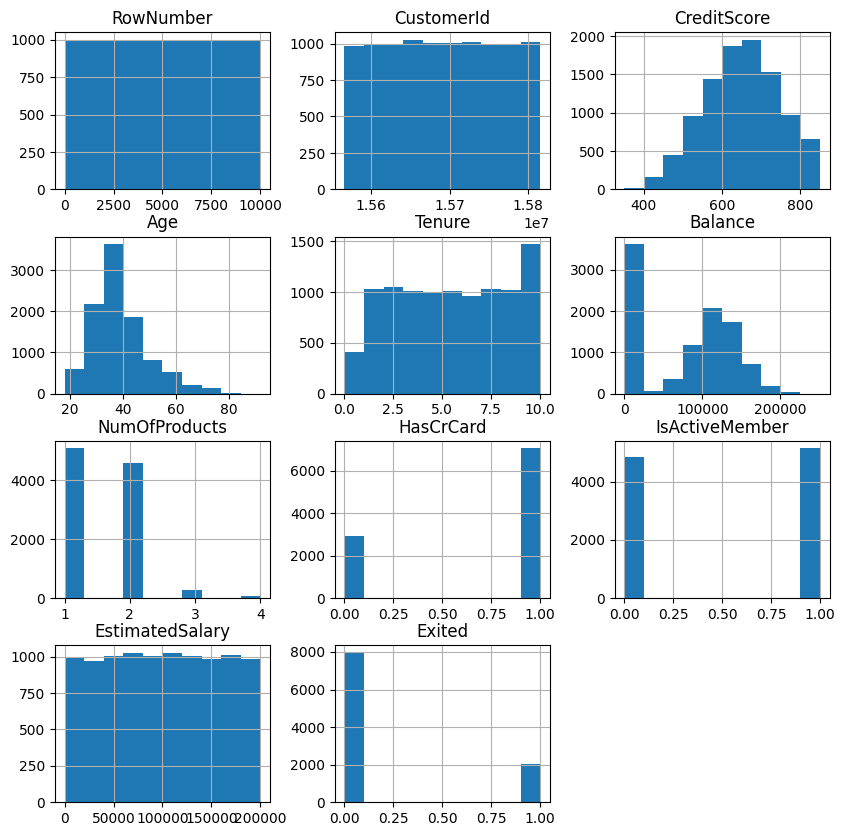

In [8]:
df1.hist(figsize=(10,10))

In [9]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df = df1.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [12]:
df.shape

(10000, 11)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [15]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [16]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [17]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [18]:
enc = LabelEncoder()
x[:,2]= enc.fit_transform(x[:,2])

In [27]:
x.shape

(10000, 12)

In [20]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder = 'passthrough')
x = np.array(ct.fit_transform(x))
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [21]:
x_tr , x_test ,y_tr , y_test = train_test_split(x,y,random_state=66,test_size=0.2)

In [22]:
std = StandardScaler()
x_tr = std.fit_transform(x_tr)
x_test = std.transform(x_test)

In [66]:
x_tr.ndim

2

In [76]:
model = Sequential()
model.add(Dense(12,input_shape =(12,),activation='leaky_relu'))

model.add(Dense(6,activation='leaky_relu'))
model.add(Dense(3,activation='leaky_relu'))
model.add(Dense(1,activation='sigmoid'))



In [77]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [87]:
early = EarlyStopping(patience=5)
callbacks = [early]

In [96]:
history = model.fit(x_tr , y_tr , batch_size= 50 , epochs = 50 , validation_split=0.2, callbacks=[callbacks])
#history = model.fit(x_tr , y_tr , batch_size= 50 , epochs = 50 , validation_split=0.2)

Epoch 1/50
128/128 [==============================] - 1s 9ms/step - loss: 0.3114 - accuracy: 0.8752 - val_loss: 0.3697 - val_accuracy: 0.8537
Epoch 2/50
128/128 [==============================] - 1s 5ms/step - loss: 0.3116 - accuracy: 0.8739 - val_loss: 0.3691 - val_accuracy: 0.8519
Epoch 3/50
128/128 [==============================] - 1s 4ms/step - loss: 0.3116 - accuracy: 0.8756 - val_loss: 0.3701 - val_accuracy: 0.8506
Epoch 4/50
128/128 [==============================] - 1s 4ms/step - loss: 0.3119 - accuracy: 0.8753 - val_loss: 0.3684 - val_accuracy: 0.8512
Epoch 5/50
128/128 [==============================] - 1s 5ms/step - loss: 0.3117 - accuracy: 0.8741 - val_loss: 0.3691 - val_accuracy: 0.8494
Epoch 6/50
128/128 [==============================] - 1s 5ms/step - loss: 0.3118 - accuracy: 0.8730 - val_loss: 0.3701 - val_accuracy: 0.8506
Epoch 7/50
128/128 [==============================] - 1s 5ms/step - loss: 0.3114 - accuracy: 0.8745 - val_loss: 0.3713 - val_accuracy: 0.8494
Epoch 

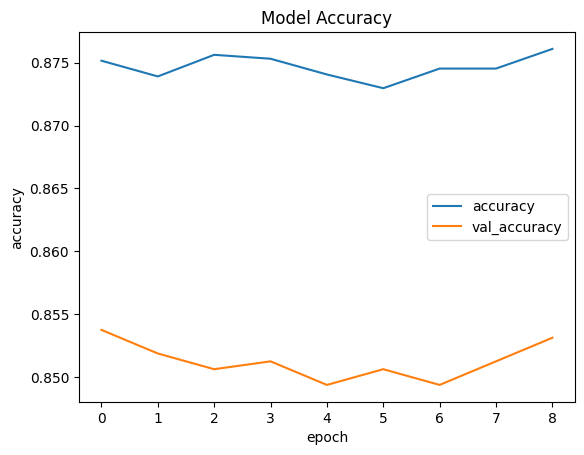

In [97]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()



In [100]:
print(model.predict(std.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>0.005)

1/1 [==============================] - 0s 31ms/step
[[ True]]


In [101]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1513   72]
 [ 214  201]]


In [103]:
accuracy_score(y_test, y_pred)

0.857